# Decision Tree Algorithm Studies

**Autoria:**  
Projeto desenvolvido em dupla por Julia Andreatta e Larissa Zózimo Antunes.

**Contexto:**  
Estudo acadêmico desenvolvido como parte da formação em Ciência da Computação.

## Descrição do projeto

Este notebook apresenta a aplicação dos algoritmos de Árvore de Decisão e de Floresta Aleatória na base de dados de risco de crédito, fazendo as importações das bibliotecas necessárias.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 1 - Importação dos dados Pré-Processados

a) importe o arquivo salvo como 'risco_credito.pkl'



In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

## 2 - Algoritmo de Árvore de Decisão



a) importar da biblioteca sklearn o pacote DecisionTreeClassifier

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

b) Calcule a árvore de decisão, utilizando como critério a entropia.
Coloque como nome da variável: arvore_risco_credito

In [ ]:
#usando bibliotecas e pacotes para calcular a árvore
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy', random_state=0) #critério e não aleatório
#.fit gera a tabela
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy', random_state=0)

c) Utilize o feature_importances_ para retornar a importância de cada atributo. Qual possui o maior ganho de informação?

In [ ]:
#calculando o ganho para cada coluna
ganho_geral = arvore_risco_credito.feature_importances_

In [ ]:
#visualizando
print(ganho_geral)

[0.3362078  0.14179499 0.03885431 0.4831429 ]


Renda possui o maior ganho de informação.

d) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS: Adicione cores, nomes para os atributos e para as classes.

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree

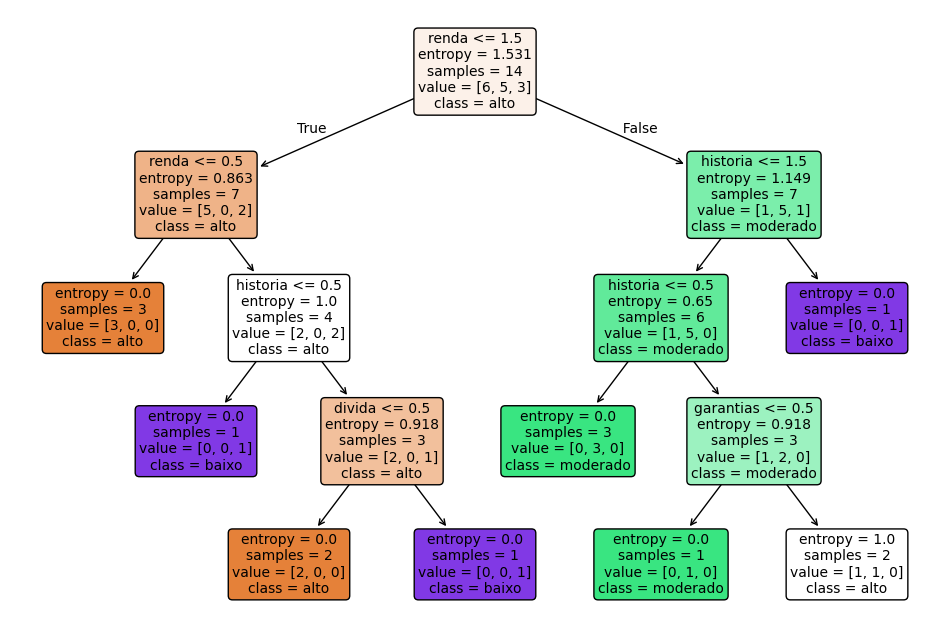

In [ ]:
#aumenta o tamanho da figura - antes tava amontoado
plt.figure(figsize=(12, 8))
tree.plot_tree(
      arvore_risco_credito,
      feature_names=['historia', 'divida', 'garantias', 'renda'],
      class_names=['alto', 'moderado', 'baixo'],
      filled=True,
      rounded=True,
      fontsize=10
)
plt.show()

e) FAZER A PREVISÃO

Utilize .predict para fazer a previsão realizada no exemplo em sala.

   i. história boa, dívida alta, garantia nenhuma, renda > 35

   ii. história ruim, dívida alta, garantia adequada, renda < 15


Verifique nos slides se seu resultado está correto!

In [ ]:
arvore_risco_credito.predict([[0, 0, 1, 2]])

array(['baixo'], dtype=object)

In [ ]:
arvore_risco_credito.predict([[2, 0, 0, 0]])

array(['alto'], dtype=object)

##3 - Algoritmo de Árvore de Decisão para uma base de dados maior (Credit Data)

Nesta seção é testado o uso da Árvore de Decisão para a Base de Dados Credit Risk Dataset. Analisando os clientes que pagam (classe 0) ou não pagam a dívida (classe 1), a fim do banco conceder empréstimo.

In [ ]:
# abrir o arquivo
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

a) Ao abrir o arquivo utilize .shape para verificar o tamanho dos dados de treinamento e de teste

OBS: os dados de treinamento devem ter as seguintes dimenções: x=(1500, 3), y=(1500,); os dados de teste devem ter as seguintes dimenções: x=(500, 3), y=(500,)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape, X_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

b) Importe o pacote DecisionTreeClassifier do sklearn para treinar o seu algoritmo de árvore de decisão. Para poder refazer os testes e obter o mesmo resultado utilize o parâmetro random_state = 0.

In [ ]:
#já importado anteriormente
import sklearn
from sklearn.tree import DecisionTreeClassifier

#usando bibliotecas e pacotes para calcular a árvore
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0) #critério e não aleatório
#.fit gera a tabela - apenas os dados de treinamento (teste é para comparar)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

In [ ]:
#fazendo previsões
previsoes = arvore_credit.predict(X_credit_teste)
print(previsoes)
#dados de teste - respostas reais
print(y_credit_teste)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
acuracia = accuracy_score(y_credit_teste, previsoes)
print(acuracia)

0.982


e) Faça a análise da Matriz de Confusão.

i. Quantos clientes foram classificados corretamente que pagam a dívida? **430**

ii. Quantos clientes foram classificados incorretamente como não pagantes?  **6**

iii. Quantos clientes foram classificados corretamente que não pagam?  **61**

iv. Quantos clientes foram classificados incorretamente como pagantes?  **3**

0.982

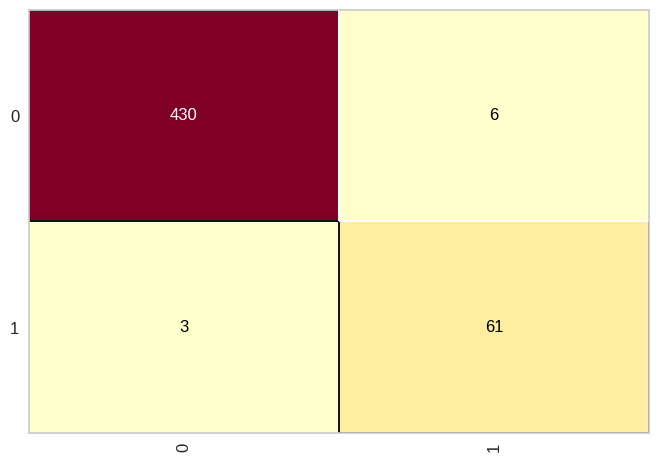

In [ ]:
#linhas=valores reais; colunas=valores previstos
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

f) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

In [ ]:
print(classification_report(y_credit_teste, previsoes)) #rótulos verdadeiros e previsões

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



A precision mede, para os casos previstos como pagantes (classe 0), quantos realmente são pagantes. Com 99% de precisão, significa que 1% das pessoas que o sistema aceitou (classificou como pagantes) na verdade são inadimplentes.

Já o recall da classe 0 é 99%, o que significa que o sistema identificou 99% dos pagantes corretamente. Os outros 1% passaram despercebidos como inadimplentes, o que representa risco financeiro real para o banco.

A precision mede, para os casos previstos como não pagantes (classe 1), quantos realmente são inadimplentes. Com 91% de precisão, significa que 9% das pessoas que o sistema recusou (classificou como inadimplentes) na verdade são bons pagadores. Ou seja, o banco perde clientes confiáveis.

Já o recall da classe 1 é 95%, o que significa que o sistema identificou 95% dos inadimplentes corretamente. Os outros 5% passaram despercebidos como bons pagadores, o que representa risco financeiro real para o banco.

No caso avaliado, o recall é mais crítico (uma vez que a precision para 0 é alta), pois classificar um inadimplente como pagante (falso negativo) pode causar prejuízos financeiros diretos ao banco. Já recusar um bom cliente (falso positivo) prejudica o relacionamento, mas não representa perda financeira direta e imediata.

g) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS 1: Os atributos previsores são = ['income', 'age', 'loan']

OBS 2: Adicione cores, nomes para os atributos e para as classes. Você pode utilizar a função fig.savefig para salvar a árvore em uma imagem .png

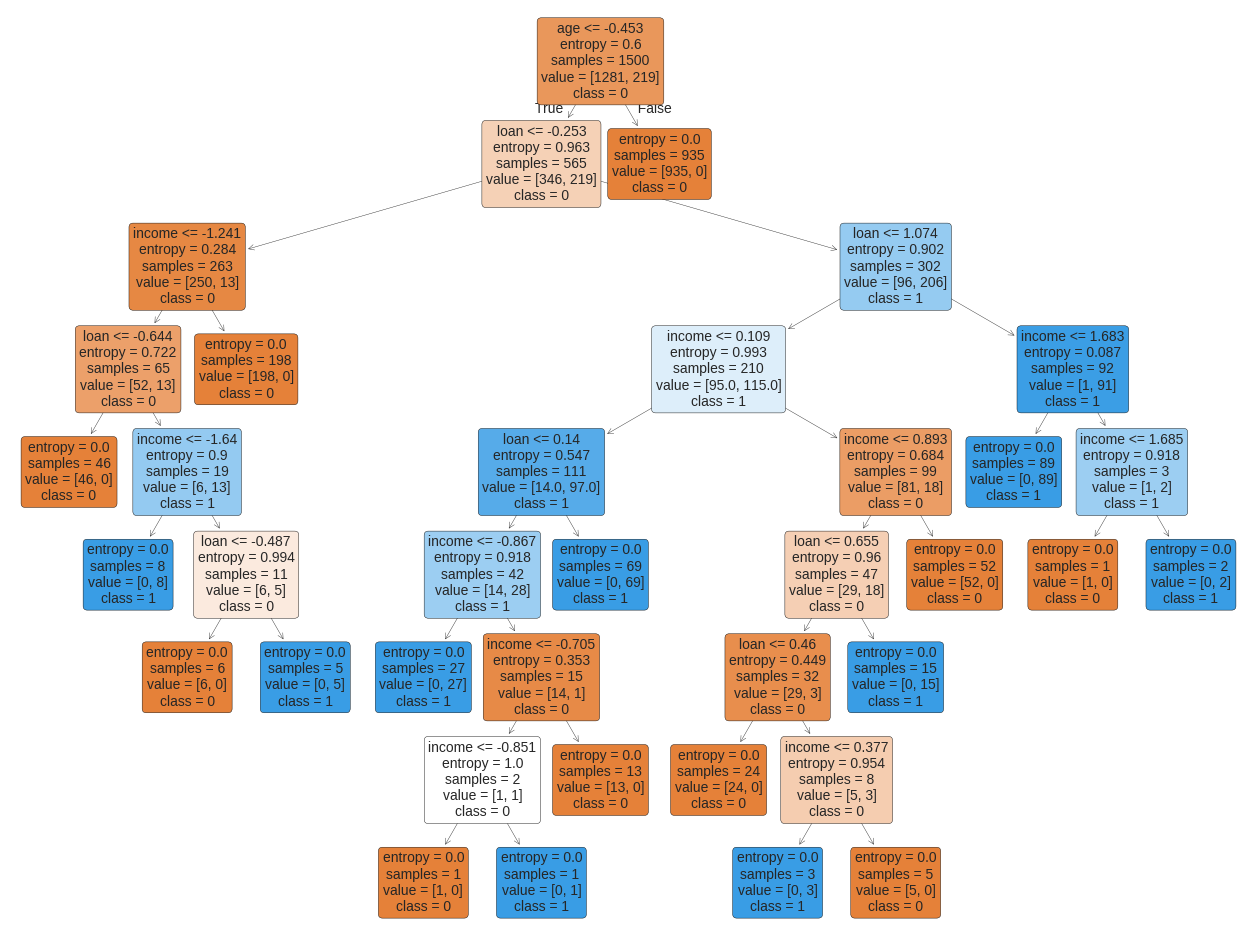

In [ ]:
plt.figure(figsize=(16, 12))
tree.plot_tree(
      arvore_credit,
      feature_names=['income', 'age', 'loan'],
      class_names=['0', '1'],
      filled=True,
      rounded=True,
      fontsize=10
)
plt.show()

## Algoritmo Random Forest

Nesta seção utilizamos o algoritmo Random Forest para a mesma base de crédito (**Credit Risk Dataset**) - arquivo *credit.pkl*.

a) Importe o pacote RandomForestClassifier do sklearn para treinar o seu algoritmo de floresta randomica.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

b) Para gerar a classificação você deve adicionar alguns parâmetros:
*   n_estimators=10  --> número de árvores que você irá criar
*   criterion='entropy'
*   random_state = 0

In [ ]:
#usando bibliotecas e pacotes para calcular a árvore
classificacao_rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0) #nº árvores, critério e não aleatório
#.fit gera a tabela - apenas os dados de treinamento (teste é para comparar)
classificacao_rf.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

In [ ]:
#fazendo previsões
previsoes_rf = classificacao_rf.predict(X_credit_teste)
print(previsoes_rf)
#dados de teste - respostas reais
print(y_credit_teste)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 

In [ ]:
erros = (previsoes_rf != y_credit_teste).sum()
print(f"Número de classificações erradas: {erros}")
#em sua maioria estão de acordo, tendo 16 classificações erradas

Número de classificações erradas: 16


d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões. O resultado foi melhor do que a árvore de decisão simples?

**Não, a árvore de decisão simples resultou em uma acurácia de 0.982, enquanto a random forest resultou em 0.968**

In [ ]:
acuracia = accuracy_score(y_credit_teste, previsoes_rf)
print(acuracia)

0.968


e) Se o resultado foi inferior, como você poderia resolver isso? Quais foram os resultados obtidos?

**Se aumentarmos o número de árvores conseguimos chegar em uma acurácia igual ou maior a árvore de decisão simples.**

15 = 0.978;
40 = 0.984;
50 = 0.98;
75 = 0.984.

In [ ]:
#usando bibliotecas e pacotes para calcular a árvore
classificacao_rf_2 = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0) #nº árvores, critério e não aleatório
#.fit gera a tabela - apenas os dados de treinamento (teste é para comparar)
classificacao_rf_2.fit(X_credit_treinamento, y_credit_treinamento)

#fazendo previsões
previsoes_rf_2 = classificacao_rf_2.predict(X_credit_teste)
print(previsoes_rf_2)
#dados de teste - respostas reais
print(y_credit_teste)

acuracia = accuracy_score(y_credit_teste, previsoes_rf_2)
print(acuracia)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 

f) Faça a análise da Matriz de Confusão.

0.968

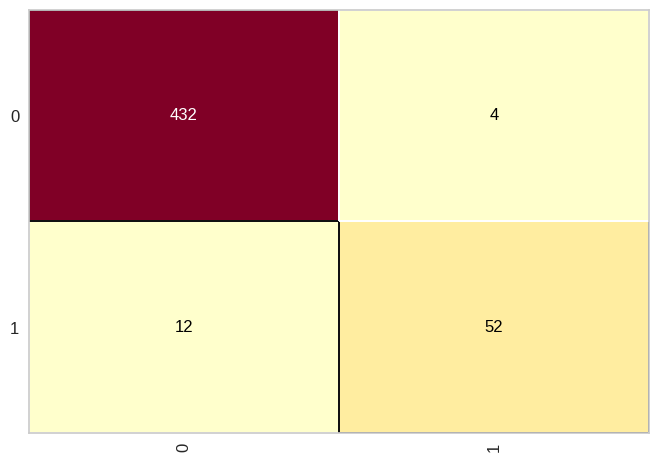

In [ ]:
#linhas=valores reais; colunas=valores previstos
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(classificacao_rf) #usando a classificação inicial
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

i. Quantos clientes foram classificados corretamente que pagam a dívida? **432**

ii. Quantos clientes foram classificados incorretamente como não pagantes? **4**

iii. Quantos clientes foram classificados corretamente que não pagam? **52**

iv. Quantos clientes foram classificados incorretamente como pagantes? **12**

0.984

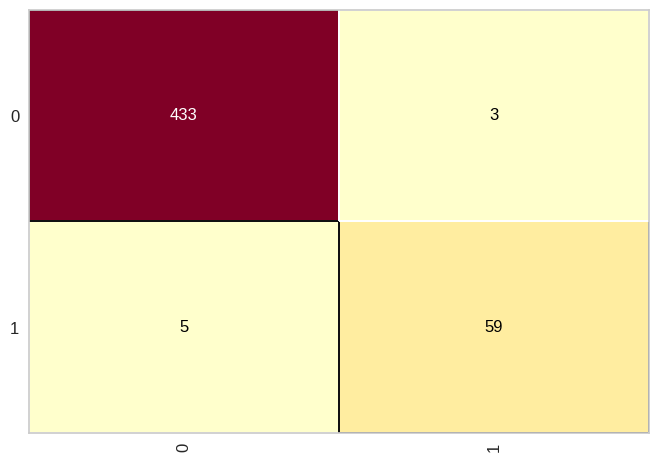

In [ ]:
#linhas=valores reais; colunas=valores previstos
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(classificacao_rf_2) #usando a classificação "ajustada"
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

i. Quantos clientes foram classificados corretamente que pagam a dívida? **433**

ii. Quantos clientes foram classificados incorretamente como não pagantes? **3**

iii. Quantos clientes foram classificados corretamente que não pagam? **59**

iv. Quantos clientes foram classificados incorretamente como pagantes? **5**

g) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

In [ ]:
print(classification_report(y_credit_teste, previsoes_rf)) #rótulos verdadeiros e previsões

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       436
           1       0.93      0.81      0.87        64

    accuracy                           0.97       500
   macro avg       0.95      0.90      0.92       500
weighted avg       0.97      0.97      0.97       500



A precision mede, para os casos previstos como pagantes (classe 0), quantos realmente são pagantes. Com 97% de precisão, significa que 3% das pessoas que o sistema aceitou (classificou como pagantes) na verdade são inadimplentes.

Já o recall da classe 0 é 99%, o que significa que o sistema identificou 99% dos pagantes corretamente. Os outros 1% passaram despercebidos como inadimplentes, o que representa risco financeiro real para o banco.

A precision mede, para os casos previstos como não pagantes (classe 1), quantos realmente são inadimplentes. Com 93% de precisão, significa que 7% das pessoas que o sistema recusou (classificou como inadimplentes) na verdade são bons pagadores. Ou seja, o banco perde clientes confiáveis.

Já o recall da classe 1 é 81%, o que significa que o sistema identificou 81% dos inadimplentes corretamente. Os outros 19% passaram despercebidos como bons pagadores, o que representa risco financeiro real para o banco.

No caso avaliado, o recall é mais crítico, pois classificar um inadimplente como pagante (falso negativo) pode causar prejuízos financeiros diretos ao banco. Já recusar um bom cliente (falso positivo) prejudica o relacionamento, mas não representa perda financeira direta e imediata.

In [ ]:
print(classification_report(y_credit_teste, previsoes_rf_2)) #rótulos verdadeiros e previsões

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



A precision mede, para os casos previstos como pagantes (classe 0), quantos realmente são pagantes. Com 99% de precisão, significa que 1% das pessoas que o sistema aceitou (classificou como pagantes) na verdade são inadimplentes.

Já o recall da classe 0 é 99%, o que significa que o sistema identificou 99% dos pagantes corretamente. Os outros 1% passaram despercebidos como inadimplentes, o que representa risco financeiro real para o banco.

A precision mede, para os casos previstos como não pagantes (classe 1), quantos realmente são inadimplentes. Com 95% de precisão, significa que 5% das pessoas que o sistema recusou (classificou como inadimplentes) na verdade são bons pagadores. Ou seja, o banco perde clientes confiáveis.

Já o recall da classe 1 é 92%, o que significa que o sistema identificou 92% dos inadimplentes corretamente. Os outros 8% passaram despercebidos como bons pagadores, o que representa risco financeiro real para o banco.

No caso avaliado, o recall é mais crítico (uma vez que a precision para 0 é alta), pois classificar um inadimplente como pagante (falso negativo) pode causar prejuízos financeiros diretos ao banco. Já recusar um bom cliente (falso positivo) prejudica o relacionamento, mas não representa perda financeira direta e imediata.